Aplica regresión lineal a los datos sintéticos que se encuentran divididos en los archivos de entre-
namiento x_entrenamiento.csv y y_entrenamiento.csv y los de validación x_validacion.csv
y y_validacion.csv4.


Estos datos fueron contaminados con ruido gaussiano con media igual a 0 y 
desviación estándar igual a 0.05. Realiza lo siguiente:

In [4]:
import os
import pandas as pd

In [ ]:
# Cargamos los datos
X_val = pd.read_csv("/Users/Leon/Documents/Data GH/Aprendizaje automático /T2/regl_data/x_validacion.csv", header=None)
X_train = pd.read_csv("/Users/Leon/Documents/Data GH/Aprendizaje automático /T2/regl_data/x_entrenamiento.csv", header=None)
y_val = pd.read_csv("/Users/Leon/Documents/Data GH/Aprendizaje automático /T2/regl_data/y_validacion.csv", header=None)
y_train = pd.read_csv("/Users/Leon/Documents/Data GH/Aprendizaje automático /T2/regl_data/y_entrenamiento.csv", header=None)

*a. Grafica los datos de entrenamiento y de validación y comenta brevemente acerca de cómo
están distribuidos.*

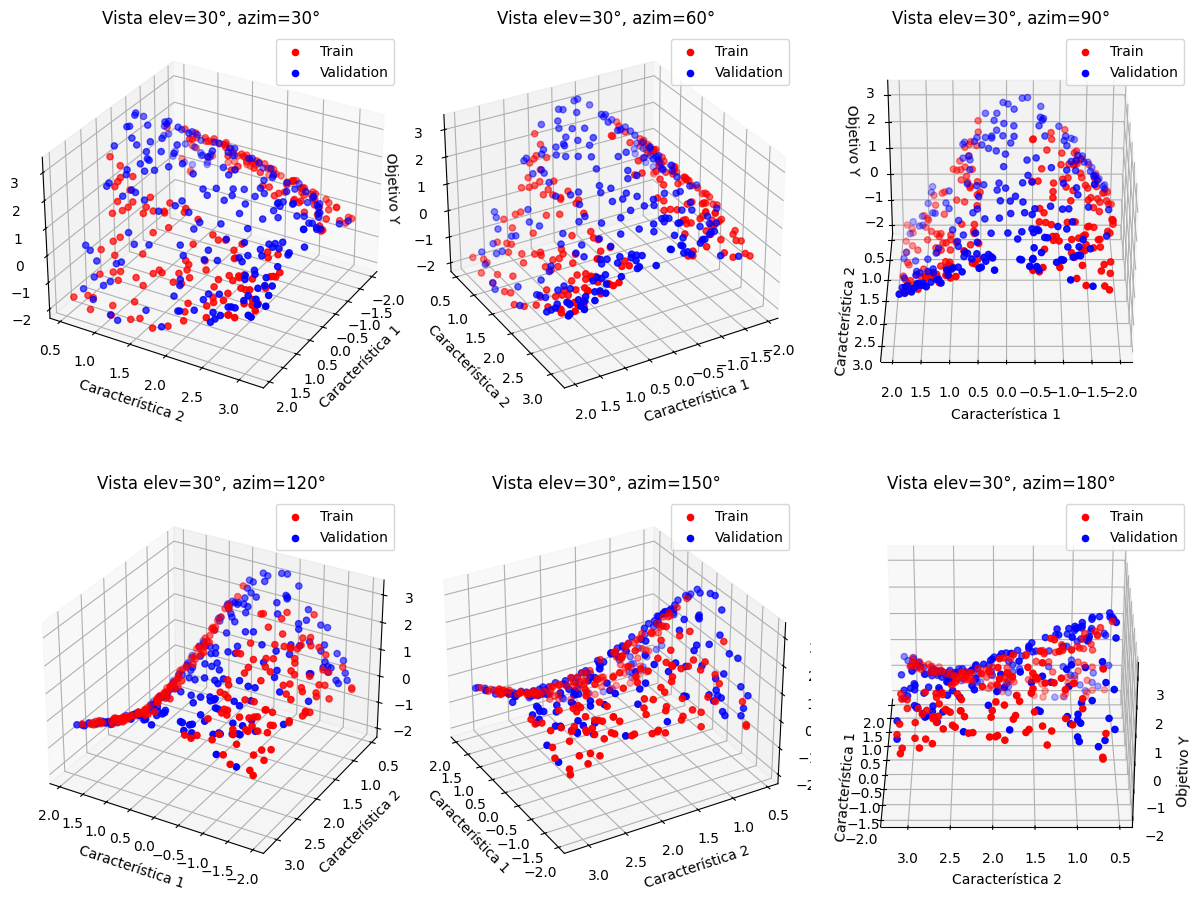

In [48]:
#Graficaremos esta información en  3D
import matplotlib.pyplot as plt

# Lista de ángulos de elevación y rotación
altura =30
vistas = [(altura, 30), (altura, 60), (altura, 90), (altura, 120), (altura, 150),(altura, 180)]

fig = plt.figure(figsize=(12, 10))

for i, (elev, azim) in enumerate(vistas, start=1):
    ax = fig.add_subplot(2, 3, i, projection='3d')
    ax.scatter(X_train[0], X_train[1], y_train[0], c='red', label='Train')
    ax.scatter(X_val[0], X_val[1], y_val[0], c='blue', label='Validation')
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')
    ax.set_zlabel('Objetivo Y')
    ax.set_title(f'Vista elev={elev}°, azim={azim}°')
    ax.view_init(elev=elev, azim=azim)
    ax.legend()

plt.tight_layout()
plt.show()


En múltiples vistas (especialmente azim=120°, 150°, 180°), se nota que los datos se curvan como una especie de superficie ondulada.
Esto nos indica sobre la no linealidad entre las variables predictoras (Característica 1 y 2) y el objetivo Y.
Validación y entrenamiento parecen bien mezclados aunque en azim=90° vemos que hay un lapso sobre caracteristica 1 en el que no observamos datos de entrenamiento.

*b. Considera un modelo de la forma f(x) = θ0 + θ1 · x1 + θ2 · x2 y realiza la regresión lineal.
Reporta los parámetros que encontraste usando el estimador de máxima verosimilitud y el
valor del error cuadrático medio para los datos de entrenamiento y de validación.*

In [70]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error


# Agregar columna de unos para el término independiente
X_train_b = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val_b = np.hstack([np.ones((X_val.shape[0], 1)), X_val])

# Estimador MLE: theta = (X^T X)^-1 X^T y
theta_hat = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

# Separar parámetros
theta_0=theta_hat[0][0]
theta_1= theta_hat[0][1]
theta_2 = theta_hat[0][2]

# Predicciones
y_train_pred = X_train_b @ theta_hat
y_val_pred = X_val_b @ theta_hat

# MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

# Resultados
print(f"θ0 (intercepto) = {theta_0:.4f}")
print(f"θ1 = {theta_1:.4f}")
print(f"θ2 = {theta_2:.4f}")
print(f"MSE Entrenamiento = {mse_train:.4f}")
print(f"MSE Validación = {mse_val:.4f}")


θ0 (intercepto) = 1.0833
θ1 = -0.5462
θ2 = -0.3006
MSE Entrenamiento = 0.5896
MSE Validación = 0.8987


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge




# Crear características polinomiales de grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Ajustar 
ridge = Ridge(alpha=.1)  # Puedes probar otros valores de alpha
ridge.fit(X_train_poly, y_train)

# Parámetros
params = ridge.coef_
intercept = ridge.intercept_

# Predicciones y MSE
y_train_pred = ridge.predict(X_train_poly)
y_val_pred = ridge.predict(X_val_poly)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

print("Intercepción:", intercept)
print("Coeficientes:", params)
print(f"MSE Entrenamiento: {mse_train:.4f}")
print(f"MSE Validación: {mse_val:.4f}")


Intercepción: [2.3326392]
Coeficientes: [-0.96694714 -0.46945842 -0.61754677  0.18284224  0.02653438]
MSE Entrenamiento: 0.1525
MSE Validación: 0.2359


c. Usa una expansión de base polinomial y entrena un modelo de regresión lineal con regulari-
zación por norma l2. Reporta los parámetros obtenidos y el error cuadrático medio para los

datos de entrenamiento y de validación. bayesiana y obtén la distribución predictiva, repor-
tando la media y la varianza para el vector  ̃x = [1, 2]. Grafica la distribución a posteriori de

los parámetros con 5, 10, 30 y 60 datos. Adicionalmente, genera 20 muestras de la distribución
a posteriori de los parámetros con 5, 10, 30 y 60 datos y gráfica las curvas de los modelos para
estas muestras.

In [87]:
y_val

,0
0,0.489523
1,1.051965
2,-1.055267
3,0.492597
4,0.660550
...,...
195,2.236324
196,-1.036521
197,0.565183
198,2.761640


In [119]:
# Crear base polinomial (ej. grado 2 o 3 según el problema)
grado = 3
poly = PolynomialFeatures(degree=grado)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

In [138]:
alpha = .1  # Puedes ajustar este valor
modelo_ridge = Ridge(alpha=alpha)
modelo_ridge.fit(X_train_poly, y_train)

Ridge(alpha=0.1)

In [136]:
# Predecir y 
y_train_pred = modelo_ridge.predict(X_train_poly)
y_val_pred = modelo_ridge.predict(X_val_poly)


In [139]:
#calcular el error cuadrático medio
ecm_train = mean_squared_error(y_train, y_train_pred)
ecm_val = mean_squared_error(y_val, y_val_pred)

# Mostrar resultados
print("Coeficientes del modelo (incluye bias):")
print(modelo_ridge.coef_)
print("\nIntercepto:")
print(modelo_ridge.intercept_)

print(f"\nError cuadrático medio en entrenamiento: {ecm_train:.4f}")
print(f"Error cuadrático medio en validación: {ecm_val:.4f}")

Coeficientes del modelo (incluye bias):
[ 0.         -0.21459444 -0.58237502 -1.30782734 -1.16962492 -0.3047447
  0.12111783  0.37128023  0.37247046  0.06670262]

Intercepto:
[3.24443654]

Error cuadrático medio en entrenamiento: 0.0081
Error cuadrático medio en validación: 0.0169
